## Access data cubes in DeepESDL public object storage
### A DeepESDL example notebook 

This concise notebook demonstrates how xcubes data stores provide convenient access to the published data cubes, generated by the Cube Gen team and persisted on object storage. The recipes used in the generation process are publicly available at in the [Cube Gen repository](https://github.com/deepesdl/cube-gen). 

Please, also refer to the [DeepESDL documentation](https://deepesdl.readthedocs.io/en/latest/guide/jupyterlab/) and visit the platform's [website](https://www.earthsystemdatalab.net/) for further information!

Brockmann Consult, 2024

-----------------

**This notebook runs with the python environment `deepesdl-xcube-1.7.0`, please checkout the documentation for [help on changing the environment](https://deepesdl.readthedocs.io/en/latest/guide/jupyterlab/#python-environment-selection-of-the-jupyter-kerne).**

In [1]:
import xcube

In [2]:
xcube.__version__

'1.6.0'

In [3]:
from xcube.core.store import new_data_store
store = new_data_store("s3", root="deep-esdl-public", storage_options=dict(anon=True))
store.list_data_ids()

['LC-1x2160x2160-1.0.0.levels',
 'SMOS-L2C-OS-20230101-20231231-1W-res0-1x1000x1000.levels',
 'SMOS-L2C-OS-20230101-20231231-1W-res0-53x120x120.zarr',
 'SMOS-L2C-OS-20230101-20231231-1W-res0.zarr',
 'SMOS-L2C-SM-20230101-20231231-1W-res0-1x1000x1000.levels',
 'SMOS-L2C-SM-20230101-20231231-1W-res0-53x120x120.zarr',
 'SMOS-L2C-SM-20230101-20231231-1W-res0.zarr',
 'SMOS-freezethaw-1x720x720-1.0.1.zarr',
 'SMOS-freezethaw-4267x10x10-1.0.1.zarr',
 'SeasFireCube_v3.zarr',
 'black-sea-1x1024x1024.levels',
 'black-sea-256x128x128.zarr',
 'esa-cci-permafrost-1x1151x1641-0.0.2.levels',
 'esdc-8d-0.25deg-1x720x1440-3.0.1.zarr',
 'esdc-8d-0.25deg-256x128x128-3.0.1.zarr',
 'hydrology-1D-0.009deg-100x60x60-3.0.2.zarr',
 'hydrology-1D-0.009deg-1418x70x76-2.0.0.zarr',
 'hydrology-1D-0.009deg-1x1102x2415-2.0.0.levels',
 'hydrology-1D-0.009deg-1x1102x966-3.0.2.levels',
 'ocean-1M-9km-1x1080x1080-1.4.0.levels',
 'ocean-1M-9km-64x256x256-1.4.0.zarr',
 'polar-100m-1x2048x2048-1.0.1.zarr']

## How to open .zarr from the datastore

In [4]:
cube = store.open_data('esdc-8d-0.25deg-1x720x1440-3.0.1.zarr')

In [5]:
cube

<xarray.Dataset> Size: 353GB
Dimensions:                            (time: 1978, lat: 720, lon: 1440)
Coordinates:
  * lat                                (lat) float64 6kB -89.88 -89.62 ... 89.88
  * lon                                (lon) float64 12kB -179.9 ... 179.9
  * time                               (time) datetime64[ns] 16kB 1979-01-05 ...
Data variables: (12/42)
    aerosol_optical_thickness_550      (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    air_temperature_2m                 (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    bare_soil_evaporation              (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    burnt_area                         (time, lat, lon) float64 16GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    cot                                (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    cth                                (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ...                                 ...
    sif_rtsif                          (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sm                                 (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    snow_sublimation                   (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    surface_moisture                   (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    terrestrial_ecosystem_respiration  (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    transpiration                      (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/23)
    Conventions:                CF-1.9
    acknowledgment:             All ESDC data providers are acknowledged insi...
    contributor_name:           ['University of Leipzig', 'Max Planck Institu...
    contributor_url:            ['https://www.uni-leipzig.de/', 'https://www....
    creator_name:               ['University of Leipzig', 'Brockmann Consult ...
    creator_url:                ['https://www.uni-leipzig.de/', 'https://www....
    ...                         ...
    publisher_url:              https://www.earthsystemdatalab.net/
    time_coverage_end:          2021-12-31T00:00:00.000000000
    time_coverage_start:        1979-01-05T00:00:00.000000000
    time_period:                8D
    time_period_reported_day:   5.0
    title:                      Earth System Data Cube (ESDC) v3.0.1

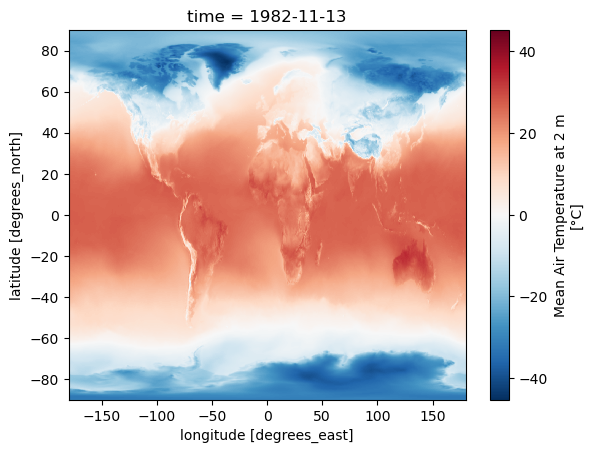

In [6]:
cube.air_temperature_2m.isel(time=177).plot()

## How to open a .levels from the datastore

.levels are [xcube Multi-Resolution Datasets](https://xcube.readthedocs.io/en/latest/mldatasets.html) which store different resolutions of a dataset as a pyramid for fast visualisation e.g. in xcube viewer.
If you see in an s3 store a dataset name with both extesions, zarr and levels, then the zarr dataset is the base layer with the higehst resolution and used in the .levels as a link.

In [7]:
ml_dataset = store.open_data('LC-1x2160x2160-1.0.0.levels')

To find out how many levels are available:#

In [8]:
ml_dataset.num_levels

6

Display information about all dataset levels, note how the lat and lon shape changes per level:

In [9]:
for level in range(ml_dataset.num_levels):
    dataset_i = ml_dataset.get_dataset(level)
    display(dataset_i)

<xarray.Dataset> Size: 1TB
Dimensions:              (time: 11, lat: 64800, lon: 129600, bounds: 2)
Coordinates:
  * lat                  (lat) float64 518kB 90.0 90.0 89.99 ... -90.0 -90.0
  * lon                  (lon) float64 1MB -180.0 -180.0 -180.0 ... 180.0 180.0
  * time                 (time) datetime64[ns] 88B 2010-01-01 ... 2020-01-01
Dimensions without coordinates: bounds
Data variables:
    change_count         (time, lat, lon) uint8 92GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    crs                  (time) int32 44B dask.array<chunksize=(11,), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 370GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lat_bounds           (time, lat, bounds) float64 11MB dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    lccs_class           (time, lat, lon) uint8 92GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lon_bounds           (time, lon, bounds) float64 23MB dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    observation_count    (time, lat, lon) uint16 185GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 370GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    time_bounds          (time, bounds) datetime64[ns] 176B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                CF-1.6
    TileSize:                   2025:2025
    cdm_data_type:              grid
    comment:                    
    contact:                    https://www.ecmwf.int/en/about/contact-us/get...
    creation_date:              20181130T095431Z
    ...                         ...
    time_coverage_end:          20101231
    time_coverage_resolution:   P1Y
    time_coverage_start:        20100101
    title:                      Land Cover Map of ESA CCI brokered by CDS
    tracking_id:                96ac9aca-1ca7-45c6-b4a5-ab448c692646
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y

<xarray.Dataset> Size: 277GB
Dimensions:              (time: 11, lat: 32400, lon: 64800, bounds: 2)
Coordinates:
  * lat                  (lat) float64 259kB 90.0 89.99 89.98 ... -89.99 -90.0
  * lon                  (lon) float64 518kB -180.0 -180.0 ... 180.0 180.0
  * time                 (time) datetime64[ns] 88B 2010-01-01 ... 2020-01-01
Dimensions without coordinates: bounds
Data variables:
    change_count         (time, lat, lon) uint8 23GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    crs                  (time) int32 44B dask.array<chunksize=(1,), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 92GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lat_bounds           (time, lat, bounds) float64 6MB dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    lccs_class           (time, lat, lon) uint8 23GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lon_bounds           (time, lon, bounds) float64 11MB dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    observation_count    (time, lat, lon) uint16 46GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 92GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    time_bounds          (time, bounds) datetime64[ns] 176B dask.array<chunksize=(11, 2), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                CF-1.6
    TileSize:                   2025:2025
    cdm_data_type:              grid
    comment:                    
    contact:                    https://www.ecmwf.int/en/about/contact-us/get...
    creation_date:              20181130T095431Z
    ...                         ...
    time_coverage_end:          20101231
    time_coverage_resolution:   P1Y
    time_coverage_start:        20100101
    title:                      Land Cover Map of ESA CCI brokered by CDS
    tracking_id:                96ac9aca-1ca7-45c6-b4a5-ab448c692646
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y

<xarray.Dataset> Size: 69GB
Dimensions:              (time: 11, lat: 16200, lon: 32400, bounds: 2)
Coordinates:
  * lat                  (lat) float64 130kB 89.99 89.98 89.97 ... -89.99 -90.0
  * lon                  (lon) float64 259kB -180.0 -180.0 ... 180.0 180.0
  * time                 (time) datetime64[ns] 88B 2010-01-01 ... 2020-01-01
Dimensions without coordinates: bounds
Data variables:
    change_count         (time, lat, lon) uint8 6GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    crs                  (time) int32 44B dask.array<chunksize=(1,), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 23GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lat_bounds           (time, lat, bounds) float64 3MB dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    lccs_class           (time, lat, lon) uint8 6GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lon_bounds           (time, lon, bounds) float64 6MB dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    observation_count    (time, lat, lon) uint16 12GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 23GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    time_bounds          (time, bounds) datetime64[ns] 176B dask.array<chunksize=(11, 2), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                CF-1.6
    TileSize:                   2025:2025
    cdm_data_type:              grid
    comment:                    
    contact:                    https://www.ecmwf.int/en/about/contact-us/get...
    creation_date:              20181130T095431Z
    ...                         ...
    time_coverage_end:          20101231
    time_coverage_resolution:   P1Y
    time_coverage_start:        20100101
    title:                      Land Cover Map of ESA CCI brokered by CDS
    tracking_id:                96ac9aca-1ca7-45c6-b4a5-ab448c692646
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y

<xarray.Dataset> Size: 17GB
Dimensions:              (time: 11, lat: 8100, lon: 16200, bounds: 2)
Coordinates:
  * lat                  (lat) float64 65kB 89.98 89.96 89.93 ... -89.98 -90.0
  * lon                  (lon) float64 130kB -180.0 -180.0 ... 180.0 180.0
  * time                 (time) datetime64[ns] 88B 2010-01-01 ... 2020-01-01
Dimensions without coordinates: bounds
Data variables:
    change_count         (time, lat, lon) uint8 1GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    crs                  (time) int32 44B dask.array<chunksize=(1,), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 6GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lat_bounds           (time, lat, bounds) float64 1MB dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    lccs_class           (time, lat, lon) uint8 1GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lon_bounds           (time, lon, bounds) float64 3MB dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    observation_count    (time, lat, lon) uint16 3GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 6GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    time_bounds          (time, bounds) datetime64[ns] 176B dask.array<chunksize=(11, 2), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                CF-1.6
    TileSize:                   2025:2025
    cdm_data_type:              grid
    comment:                    
    contact:                    https://www.ecmwf.int/en/about/contact-us/get...
    creation_date:              20181130T095431Z
    ...                         ...
    time_coverage_end:          20101231
    time_coverage_resolution:   P1Y
    time_coverage_start:        20100101
    title:                      Land Cover Map of ESA CCI brokered by CDS
    tracking_id:                96ac9aca-1ca7-45c6-b4a5-ab448c692646
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y

<xarray.Dataset> Size: 4GB
Dimensions:              (time: 11, lat: 4050, lon: 8100, bounds: 2)
Coordinates:
  * lat                  (lat) float64 32kB 89.96 89.91 89.87 ... -89.95 -90.0
  * lon                  (lon) float64 65kB -180.0 -180.0 -179.9 ... 179.9 180.0
  * time                 (time) datetime64[ns] 88B 2010-01-01 ... 2020-01-01
Dimensions without coordinates: bounds
Data variables:
    change_count         (time, lat, lon) uint8 361MB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    crs                  (time) int32 44B dask.array<chunksize=(1,), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 1GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lat_bounds           (time, lat, bounds) float64 713kB dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    lccs_class           (time, lat, lon) uint8 361MB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lon_bounds           (time, lon, bounds) float64 1MB dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    observation_count    (time, lat, lon) uint16 722MB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 1GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    time_bounds          (time, bounds) datetime64[ns] 176B dask.array<chunksize=(11, 2), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                CF-1.6
    TileSize:                   2025:2025
    cdm_data_type:              grid
    comment:                    
    contact:                    https://www.ecmwf.int/en/about/contact-us/get...
    creation_date:              20181130T095431Z
    ...                         ...
    time_coverage_end:          20101231
    time_coverage_resolution:   P1Y
    time_coverage_start:        20100101
    title:                      Land Cover Map of ESA CCI brokered by CDS
    tracking_id:                96ac9aca-1ca7-45c6-b4a5-ab448c692646
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y

<xarray.Dataset> Size: 1GB
Dimensions:              (time: 11, lat: 2025, lon: 4050, bounds: 2)
Coordinates:
  * lat                  (lat) float64 16kB 89.91 89.82 89.73 ... -89.91 -90.0
  * lon                  (lon) float64 32kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * time                 (time) datetime64[ns] 88B 2010-01-01 ... 2020-01-01
Dimensions without coordinates: bounds
Data variables:
    change_count         (time, lat, lon) uint8 90MB dask.array<chunksize=(1, 2025, 2160), meta=np.ndarray>
    crs                  (time) int32 44B dask.array<chunksize=(1,), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 361MB dask.array<chunksize=(1, 2025, 2160), meta=np.ndarray>
    lat_bounds           (time, lat, bounds) float64 356kB dask.array<chunksize=(1, 2025, 2), meta=np.ndarray>
    lccs_class           (time, lat, lon) uint8 90MB dask.array<chunksize=(1, 2025, 2160), meta=np.ndarray>
    lon_bounds           (time, lon, bounds) float64 713kB dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    observation_count    (time, lat, lon) uint16 180MB dask.array<chunksize=(1, 2025, 2160), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 361MB dask.array<chunksize=(1, 2025, 2160), meta=np.ndarray>
    time_bounds          (time, bounds) datetime64[ns] 176B dask.array<chunksize=(11, 2), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                CF-1.6
    TileSize:                   2025:2025
    cdm_data_type:              grid
    comment:                    
    contact:                    https://www.ecmwf.int/en/about/contact-us/get...
    creation_date:              20181130T095431Z
    ...                         ...
    time_coverage_end:          20101231
    time_coverage_resolution:   P1Y
    time_coverage_start:        20100101
    title:                      Land Cover Map of ESA CCI brokered by CDS
    tracking_id:                96ac9aca-1ca7-45c6-b4a5-ab448c692646
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y

Get a dataset at a certain level to continue analysis with it. 

In [10]:
dataset_i = ml_dataset.get_dataset(2)

In [11]:
dataset_i

<xarray.Dataset> Size: 69GB
Dimensions:              (time: 11, lat: 16200, lon: 32400, bounds: 2)
Coordinates:
  * lat                  (lat) float64 130kB 89.99 89.98 89.97 ... -89.99 -90.0
  * lon                  (lon) float64 259kB -180.0 -180.0 ... 180.0 180.0
  * time                 (time) datetime64[ns] 88B 2010-01-01 ... 2020-01-01
Dimensions without coordinates: bounds
Data variables:
    change_count         (time, lat, lon) uint8 6GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    crs                  (time) int32 44B dask.array<chunksize=(1,), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 23GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lat_bounds           (time, lat, bounds) float64 3MB dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    lccs_class           (time, lat, lon) uint8 6GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lon_bounds           (time, lon, bounds) float64 6MB dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    observation_count    (time, lat, lon) uint16 12GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 23GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    time_bounds          (time, bounds) datetime64[ns] 176B dask.array<chunksize=(11, 2), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                CF-1.6
    TileSize:                   2025:2025
    cdm_data_type:              grid
    comment:                    
    contact:                    https://www.ecmwf.int/en/about/contact-us/get...
    creation_date:              20181130T095431Z
    ...                         ...
    time_coverage_end:          20101231
    time_coverage_resolution:   P1Y
    time_coverage_start:        20100101
    title:                      Land Cover Map of ESA CCI brokered by CDS
    tracking_id:                96ac9aca-1ca7-45c6-b4a5-ab448c692646
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y